In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./MLC_SP23/clean_data/merged_data.csv", low_memory=False, index_col=[0])

In [2]:
#listing acs columns to drop

drop_acs_list = ['hh_inc_med_19', 'own_burden_med_19', 'own_burden_nomort_med_19', 
                'pop_u18_pct_19', 'pop_18_64_pct_19', 'pop_fam_pct_19', 'pop_nonfam_pct_19', 
                'pop_gq_pct_19', 'pop_alone_pct_19', 'hh_other_nonfam_pct_19', 'pop_edu_nohs_pct_19',
                'pop_edu_somecoll_pct_19', 'pop_edu_coll_pct_19', 'pop_edu_grad_pct_19',
                 'pop_mobile1_same_state_pct_19', 'hh_inc_earn_pct_19', 'unit_occ_pct_19',
                 'unit_occ_rent_nochild_pct_19', 'unit_rent_cash_low_pct_19', 'unit_rent_cash_moderate_pct_19',
                'hh_inc_rent_med_19', 'own_cost_nomort_med_19', 'rent_gross_med_19', 'pop_own_pct_19',
                'hh_inc_self_emp_pct_19', 'hh_inc_int_div_pct_19', 'hh_inc_soc_sec_pct_19', 'hh_inc_pubasst_pct_19', 
                'hh_inc_other_pct_19', 'unit_occ_own_pct_19', 'unit_occ_rent_pct_19', 'unit_occ_rent_sevcrowd_pct_19',
                'unit_rent_cash_pct_19', 'rent_burden_mod_pct_19', 'rent_burden_sev_pct_19']

#keep only columns not in drop_acs_list
df = df[df.columns[~df.columns.isin(drop_acs_list)]]

In [3]:
df.head()

,bbl,rs_share_diff,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,...,hh_inc_pubasst_snap_pct_19,hh_inc_retirement_pct_19,unit_vac_pct_19,unit_vac_rent_pct_19,unit_occ_rent_crowd_pct_19,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19
0,1000780047,0.0000,483,1,101,1502,2016,0.0,0.0,0.0,...,0.000000,0.041974,0.157668,0.046466,0.125601,0.102265,0.020522,0.083478,0.326156,0.450691
1,1001350019,0.0000,4,1,101,21,1915,0.0,0.0,0.0,...,0.019019,0.064663,0.189831,0.039748,0.048620,0.160315,0.004743,0.000000,0.241661,0.457072
2,1001620013,-0.0500,20,1,103,29,1915,0.0,0.0,0.0,...,0.443233,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518
3,1001630024,0.1875,16,1,103,29,1915,0.0,0.0,0.0,...,0.443233,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518
4,1001630033,0.0000,11,1,103,29,1915,0.0,0.0,0.0,...,0.443233,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518


In [4]:
# Convert the target var from continuous to binary

df.loc[df['rs_share_diff'] < 0, 'rs_share_diff_new'] = 1
df.loc[df['rs_share_diff'] >= 0, 'rs_share_diff_new'] = 0

In [5]:
df = df.drop(['rs_share_diff'], axis=1)

In [6]:
df.loc[df['rs_share_diff_new'] == 0]

,bbl,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,aleration_count,...,hh_inc_retirement_pct_19,unit_vac_pct_19,unit_vac_rent_pct_19,unit_occ_rent_crowd_pct_19,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19,rs_share_diff_new
0,1000780047,483,1,101,1502,2016,0.0,0.0,0.0,0.0,...,0.041974,0.157668,0.046466,0.125601,0.102265,0.020522,0.083478,0.326156,0.450691,0.0
1,1001350019,4,1,101,21,1915,0.0,0.0,0.0,0.0,...,0.064663,0.189831,0.039748,0.048620,0.160315,0.004743,0.000000,0.241661,0.457072,0.0
3,1001630024,16,1,103,29,1915,0.0,0.0,0.0,0.0,...,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,0.0
4,1001630033,11,1,103,29,1915,0.0,0.0,0.0,1.0,...,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,0.0
5,1001640049,19,1,103,29,1915,0.0,0.0,0.0,1.0,...,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,4001360036,7,4,402,25301,1924,0.0,0.0,0.0,0.0,...,0.072034,0.118992,0.052895,0.070547,0.229865,0.461259,0.161017,0.523723,0.678053,0.0
38963,4019390011,68,4,404,44301,2016,0.0,0.0,0.0,0.0,...,0.088258,0.133788,0.072327,0.212712,0.297458,0.309322,0.075424,0.643301,0.374426,0.0
38964,4049590008,7,4,407,869,1930,0.0,0.0,0.0,0.0,...,0.037092,0.159601,0.047541,0.148021,0.263339,0.360507,0.221014,0.771037,0.162352,0.0
38965,4052630021,47,4,407,1155,1929,0.0,2.0,0.0,0.0,...,0.122963,0.046610,0.051402,0.182266,0.359606,0.390244,0.113821,0.602273,0.651452,0.0


In [7]:
df.loc[df['rs_share_diff_new'] == 1]

,bbl,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,aleration_count,...,hh_inc_retirement_pct_19,unit_vac_pct_19,unit_vac_rent_pct_19,unit_occ_rent_crowd_pct_19,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19,rs_share_diff_new
2,1001620013,20,1,103,29,1915,0.0,0.0,0.0,0.0,...,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,1.0
11,1002050023,22,1,102,41,1900,0.0,0.0,0.0,0.0,...,0.085799,0.117032,0.017890,0.125628,0.115264,0.076215,0.094951,0.379087,0.555189,1.0
13,1002350005,6,1,102,41,1915,0.0,0.0,0.0,0.0,...,0.085799,0.117032,0.017890,0.125628,0.115264,0.076215,0.094951,0.379087,0.555189,1.0
14,1002360026,21,1,102,41,1900,0.0,0.0,0.0,0.0,...,0.085799,0.117032,0.017890,0.125628,0.115264,0.076215,0.094951,0.379087,0.555189,1.0
15,1002370011,15,1,102,41,1900,0.0,0.0,0.0,0.0,...,0.085799,0.117032,0.017890,0.125628,0.115264,0.076215,0.094951,0.379087,0.555189,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37769,5042120047,14,5,502,134,1976,0.0,0.0,0.0,0.0,...,0.320852,0.038485,0.000000,0.072034,0.273305,0.277136,0.161663,0.408521,0.341175,1.0
37771,5046330283,20,5,503,14605,1977,0.0,0.0,0.0,0.0,...,0.336923,0.056604,0.000000,0.085106,0.143617,0.255556,0.188889,0.322222,0.190448,1.0
37774,5046570021,12,5,503,13204,1974,0.0,0.0,0.0,0.0,...,0.246649,0.038164,0.000000,0.000000,0.296000,0.380000,0.036000,0.504000,0.298333,1.0
37778,5050160005,65,5,503,13204,1976,0.0,0.0,0.0,0.0,...,0.246649,0.038164,0.000000,0.000000,0.296000,0.380000,0.036000,0.504000,0.298333,1.0


In [8]:
df['hpd_call_2017_19'] = df['hpd_calls_2017'] + df['hpd_calls_2018'] + df['hpd_calls_2019']
df['hpd_call_2017_19']

0         4.0
1         0.0
2         2.0
3         1.0
4         0.0
         ... 
38962     0.0
38963     1.0
38964     0.0
38965    48.0
38966    18.0
Name: hpd_call_2017_19, Length: 38967, dtype: float64

In [9]:
df = df.drop(['hpd_calls_2017','hpd_calls_2018','hpd_calls_2019'], axis=1)

In [10]:
# log transformation of skewed var that aren't dropped
log_cols = ['hh_inc_avg_19','pop_race_asian_pct_19','pop_race_black_pct_19','pop16_unemp_pct_19','pop_mobile1_diff_state_pct_19']
for col in log_cols:
    col_name = '{}_log1'.format(col)
    df[col_name] = np.log1p(df[col])
    df = df.drop(col, axis=1)


In [11]:
len(df.columns.to_list())

76

IndexError: list index out of range

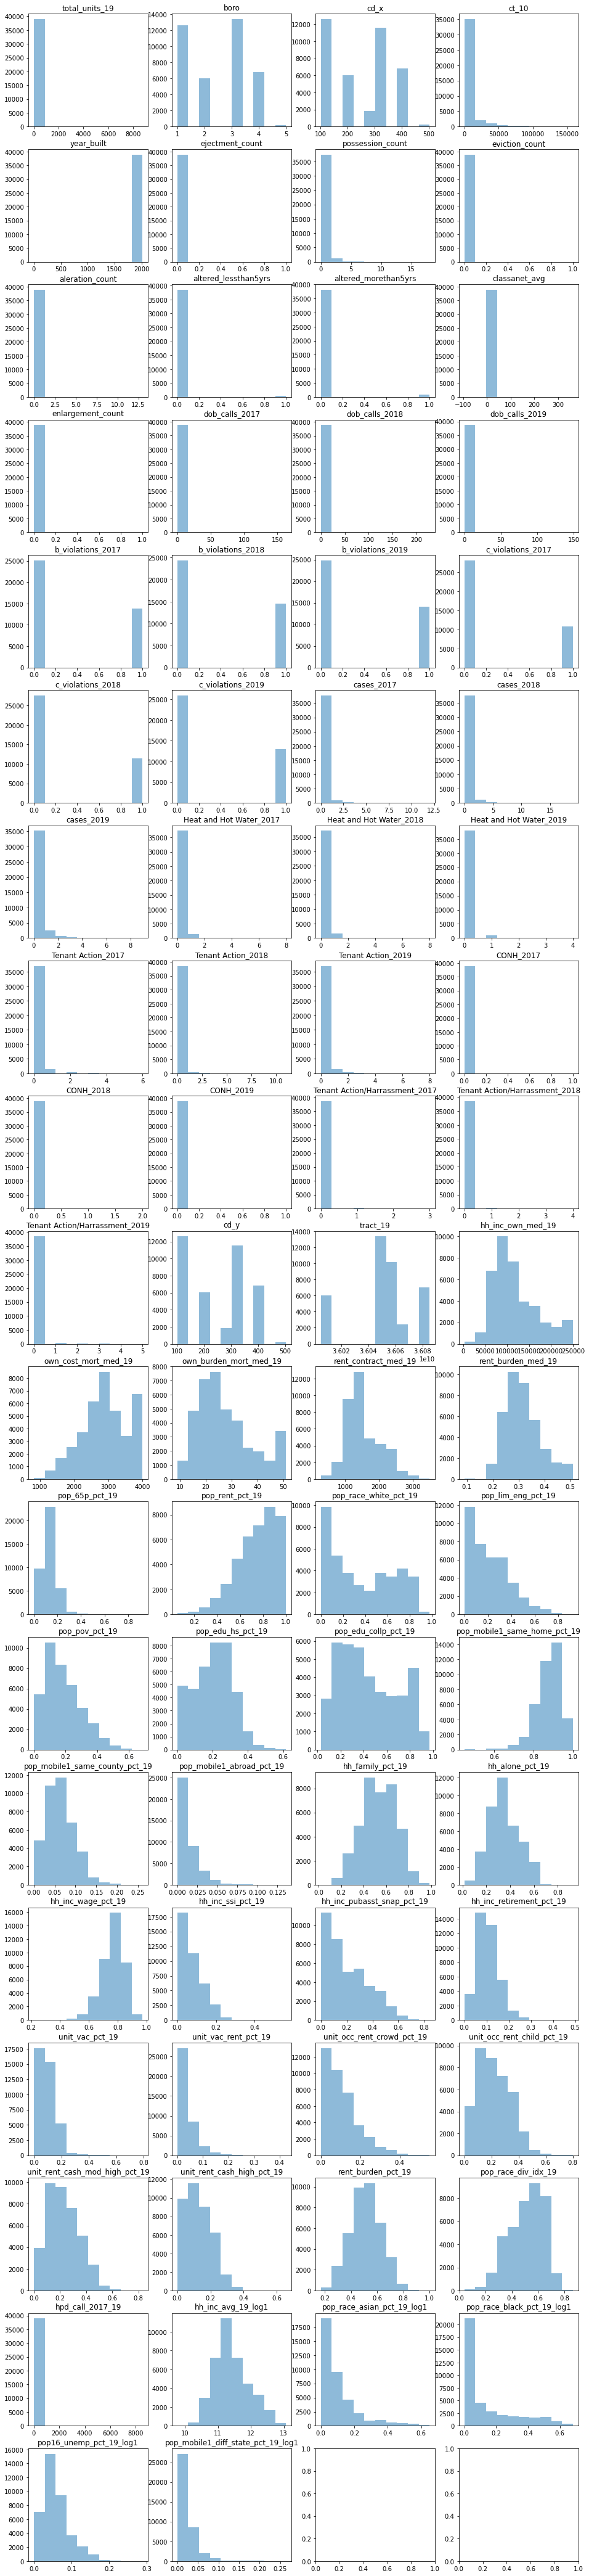

In [13]:
# New Histogram
import matplotlib
import matplotlib.pyplot as plt

features = df.columns.to_list()
features.remove('bbl')
features.remove('rs_share_diff_new')

rows=19
cols=4
fig, axes = plt.subplots(figsize=(cols*4, rows*4), ncols=cols, nrows=rows)

for i, row in enumerate(axes):
    for j, axe in enumerate(row):
        my_col = features[i*cols + j]
        my_data = df[my_col]
        axe.hist(my_data, alpha=0.5)
        axe.set_title(my_col)

In [14]:
df.head()

,bbl,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,aleration_count,...,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19,rs_share_diff_new,hpd_call_2017_19,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,483,1,101,1502,2016,0.0,0.0,0.0,0.0,...,0.083478,0.326156,0.450691,0.0,4.0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,4,1,101,21,1915,0.0,0.0,0.0,0.0,...,0.000000,0.241661,0.457072,0.0,0.0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,20,1,103,29,1915,0.0,0.0,0.0,0.0,...,0.118950,0.701854,0.612518,1.0,2.0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,16,1,103,29,1915,0.0,0.0,0.0,0.0,...,0.118950,0.701854,0.612518,0.0,1.0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,11,1,103,29,1915,0.0,0.0,0.0,1.0,...,0.118950,0.701854,0.612518,0.0,0.0,10.973689,0.461379,0.096629,0.037102,0.008935


In [15]:
df.to_csv('./merged_data_v2.csv')